<a href="https://colab.research.google.com/github/Luseat/Analisis-Sentimen-palystore-apk-tiktok/blob/main/analisis_sentimen_apk_tiktok.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraly**

In [85]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import classification_report
import nltk

nltk.download('punkt')
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from sklearn.pipeline import Pipeline
from wordcloud import WordCloud, STOPWORDS
import re


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [86]:
# mengambil dataset dari link raw github yang diambil dari playstore apk tiktok
url = "https://raw.githubusercontent.com/Luseat/Analisis-Sentimen-palystore-apk-tiktok/refs/heads/main/tiktok.csv"
df = pd.read_csv(url)
df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,8c029d6c-9282-4034-9838-53f957384007,Amin Santoso,https://play-lh.googleusercontent.com/a-/ALV-U...,Tiktok sangat bagus. Bisa berkarya dan mendapa...,5,622,34.3.3,2024-04-20 20:26:25,NaN,NaN,34.3.3
1,5be47d92-8ede-4f9a-a613-3107e9bfbde2,monica hsu,https://play-lh.googleusercontent.com/a/ACg8oc...,Saya suka dengan aplikasi tiktok dan aktif men...,5,1332,33.8.5,2024-03-13 23:45:22,NaN,NaN,33.8.5
2,a8d020fa-07ac-46e1-9ec1-9a1d6b24abec,Oppo A16,https://play-lh.googleusercontent.com/a/ACg8oc...,Maaf saya kasih 🌟 2 karena aplikasi nya kurang...,2,30,34.5.5,2024-05-04 02:50:04,NaN,NaN,34.5.5
3,26fbfb0b-c11b-46e5-8e8b-d9a2803615ee,Verdi Ximenes,https://play-lh.googleusercontent.com/a-/ALV-U...,Tiktok nya sangat bagus tapi pas di buka video...,3,57,33.8.5,2024-04-18 20:02:07,NaN,NaN,33.8.5
4,07d94c25-28a3-4b6d-a404-720513cf1c9a,Nenk shinta,https://play-lh.googleusercontent.com/a-/ALV-U...,Kenapa dengan tiktok saya pas buka muter muter...,2,1799,34.1.5,2024-04-08 15:41:52,NaN,NaN,34.1.5
...,...,...,...,...,...,...,...,...,...,...,...
393,f6998227-f297-4c94-a3b4-c05c79ae3d98,F5X,https://play-lh.googleusercontent.com/a/ACg8oc...,Hallo saya sangat kecewa sama tiktok karena sa...,1,133,25.7.3,2022-08-18 08:50:31,NaN,NaN,25.7.3
394,9c4b27b6-941e-4d45-97ff-9232132d6663,ozho jabra,https://play-lh.googleusercontent.com/a-/ALV-U...,Aplikasi ini sangat penting untuk menghibur da...,5,10,NaN,2020-09-06 13:06:58,NaN,NaN,NaN
395,6f8c4dd1-714c-4210-ba0b-37b70ee02ed8,Sisan Ismail,https://play-lh.googleusercontent.com/a/ACg8oc...,"aplikasi ini sangat bagus dan menghibur, tapi ...",5,5,NaN,2020-07-12 22:41:40,NaN,NaN,NaN
396,adc9f7f6-3586-4fa4-9e4c-01681b9c55f0,Neli Wulansari,https://play-lh.googleusercontent.com/a/ACg8oc...,Banyak ilmu yang didapat dan untuk pengalaman ...,5,81,23.7.3,2022-03-24 20:28:18,NaN,NaN,23.7.3


# **Cleaning Data**

In [87]:
df = df[['content', 'score']]
df

,content,score
0,Tiktok sangat bagus. Bisa berkarya dan mendapa...,5
1,Saya suka dengan aplikasi tiktok dan aktif men...,5
2,Maaf saya kasih 🌟 2 karena aplikasi nya kurang...,2
3,Tiktok nya sangat bagus tapi pas di buka video...,3
4,Kenapa dengan tiktok saya pas buka muter muter...,2
...,...,...
393,Hallo saya sangat kecewa sama tiktok karena sa...,1
394,Aplikasi ini sangat penting untuk menghibur da...,5
395,"aplikasi ini sangat bagus dan menghibur, tapi ...",5
396,Banyak ilmu yang didapat dan untuk pengalaman ...,5


In [88]:
df.shape # total ada 398 data dan 2 kolom (content dan score)

(398, 2)

In [89]:
# menghinlangkan data yang sama
df = df.drop_duplicates(subset=['content'])

In [90]:
df = df.dropna() #menghilangkan data kosong

In [91]:
df.shape

(398, 2)

In [92]:
def clean_tiktok_data(text):
  text = re.sub(r'@[A-Za-z0-9_]+', '', text) # menghilangkan mention
  text = re.sub(r'#\w+', '', text) # menghilangkan hashtag
  text = re.sub(r'RT\s+', '', text) # menghilangkan retweet
  text = re.sub(r'http\S+', '', text) # menghilangkan link

  text = re.sub(r'[^A-Za-z0-9 ]', '', text) # menghilangkan karakter khusus
  text = re.sub(r'\s+', ' ', text).strip( ) # menghilangkan spasi ganda

  return text

df['content'] = df['content'].apply(clean_tiktok_data)

In [93]:
df['content'] = df['content'].str.lower()

In [94]:
df.head()

,content,score
0,tiktok sangat bagus bisa berkarya dan mendapat...,5
1,saya suka dengan aplikasi tiktok dan aktif men...,5
2,maaf saya kasih 2 karena aplikasi nya kurang b...,2
3,tiktok nya sangat bagus tapi pas di buka video...,3
4,kenapa dengan tiktok saya pas buka muter muter...,2


# **Preprocessing**

In [95]:
score = df['score']
score

,score
0,5
1,5
2,2
3,3
4,2
...,...
393,1
394,5
395,5
396,5


In [96]:
def filter_tokens_by_length(dataframe, column, min_words, max_words):
  words_count = dataframe[column].astype(str).apply(lambda x: len(x.split()))
  mask = (words_count >= min_words) & (words_count <= max_words)
  filtered_df = dataframe[mask]
  return filtered_df


min_words = 3 # minimal 3 kata dibawah 3 maka dihapus
max_words = 50 # minimal 50 kata diatas 50 lebih maka dihapus
df = filter_tokens_by_length(df, 'content', min_words, max_words)

In [97]:
# normalisasi
norm = {' gk ' : ' tidak ', ' profisional ' : ' profesional ', ' skrng ' : ' sekarang ',' uwang ' : ' uang ', ' tiktokan ' : ' tiktok ', ' yg ' : ' yang ', ' udh ' : ' udah ', ' wkwk ' : '  ', ' min ' : ' kak ', ' malem ' : ' malam ', ' malem2 ' : ' malam ', ' sma ' : ' sama ', ' dgn ' : ' dengan ', ' muter ' : ' putar ' }

def normalisasi(str_text):
  for i in norm:
    str_text = str_text.replace(i, norm[i])
  return str_text

df['content'] = df['content'].apply(lambda x: normalisasi(x))

In [98]:
# Stopword
!pip install Sastrawi
import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
more_stop_word = []

stop_words =  StopWordRemoverFactory().get_stop_words()
stop_words.extend(more_stop_word)

new_array = ArrayDictionary(stop_words)
stop_words_remover_new = StopWordRemover(new_array)

def stop_words(str_text):
  str_text = stop_words_remover_new.remove(str_text)
  return str_text

df['content'] = df['content'].apply(lambda x: stop_words(x))


In [99]:
# Tokenize
tokenized = df['content'].apply(lambda x: x.split())
tokenized

,content
0,"[tiktok, sangat, bagus, berkarya, mendapat, te..."
2,"[maaf, kasih, 2, aplikasi, nya, kurang, bagus,..."
3,"[tiktok, nya, sangat, bagus, pas, buka, video,..."
4,"[dengan, tiktok, pas, buka, putar, muter, pada..."
5,"[makin, update, malah, oploadnya, selalu, gaga..."
...,...
393,"[hallo, sangat, kecewa, sama, tiktok, saya, pu..."
394,"[aplikasi, sangat, penting, menghibur, menarik..."
395,"[aplikasi, sangat, bagus, menghibur, sayang, h..."
396,"[banyak, ilmu, didapat, untuk, pengalaman, dis..."


In [100]:
# stemming
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def stemming(text_cleaning):
  factory =  StemmerFactory()
  stemmer = factory.create_stemmer()
  do = []
  for w in text_cleaning:
    dt = stemmer.stem(w)
    do.append(dt)
  d_clean = []
  d_clean = " ".join(do)
  return d_clean

tokenized = tokenized.apply(stemming) # untuk menghapus yang  memiliki kata imbuhan dan hanya befokus ke kolom konten yang sebelumnya sudah di pisahkan di bagian score = df['score']

In [101]:
tokenized # nantinya score dan conten akan di gabungkan lagi

,content
0,tiktok sangat bagus karya dapat teman banyak b...
2,maaf kasih 2 aplikasi nya kurang bagus padahal...
3,tiktok nya sangat bagus pas buka video nya non...
4,dengan tiktok pas buka putar muter padahal wif...
5,makin update malah oploadnya selalu gagal mulu...
...,...
393,hallo sangat kecewa sama tiktok saya punya aku...
394,aplikasi sangat penting hibur tarik waktu sedih
395,aplikasi sangat bagus hibur sayang hp sya kent...
396,banyak ilmu dapat untuk alam tiap waktu simpan...


In [103]:
score

,score
0,5
1,5
2,2
3,3
4,2
...,...
393,1
394,5
395,5
396,5


In [106]:
# Menggabungkan kedua Dataframe berdasarkan index
score.drop(columns=["Unname: 0"], inplace = True)
df = pd.concat([tokenized, score], axis=1)
df.head()

,content,score
0,tiktok sangat bagus karya dapat teman banyak b...,5
2,maaf kasih 2 aplikasi nya kurang bagus padahal...,2
3,tiktok nya sangat bagus pas buka video nya non...,3
4,dengan tiktok pas buka putar muter padahal wif...,2
5,makin update malah oploadnya selalu gagal mulu...,1


# **Labeling (Positif dan Negatif)**

In [130]:
def label_sentimen(score):
  if score <= 2:
    return 'negatif'
  else:
    return 'positif'

df['sentimen'] = df['score'].apply(label_sentimen)

In [134]:
df.head()

,content,score,sentimen
0,tiktok sangat bagus karya dapat teman banyak b...,5,positif
2,maaf kasih 2 aplikasi nya kurang bagus padahal...,2,negatif
3,tiktok nya sangat bagus pas buka video nya non...,3,positif
4,dengan tiktok pas buka putar muter padahal wif...,2,negatif
5,makin update malah oploadnya selalu gagal mulu...,1,negatif


In [132]:
sentiment_counts = df.sentimen.value_counts()
sentiment_counts


,count
sentimen,
positif,247
negatif,151


# **Visualization**

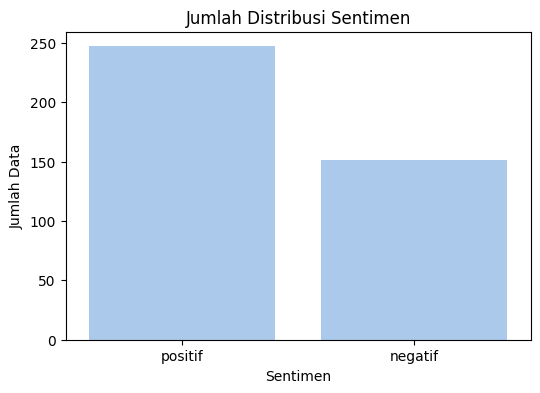

In [135]:
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

# Visualization

sns.set_palette("pastel")
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='sentimen')
plt.title('Jumlah Distribusi Sentimen')
plt.xlabel("Sentimen")
plt.ylabel("Jumlah Data")
plt.show()

In [136]:
data_negative = df[df['sentimen'] == 'negatif']
data_positive = df[df['sentimen'] == 'positif']

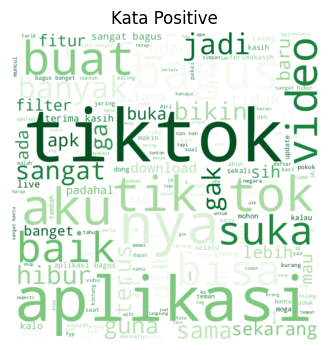

In [137]:
# menampilkan kata dominan positive seperti tiktok, suka, baik, bikin
all_text_s1 = ' '.join(str(word) for word in data_positive["content"])
wordcloud = WordCloud(colormap = 'Greens', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text_s1)
plt.figure(figsize=(6, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Kata Positive')
plt.margins(x=0, y=0)
plt.show()

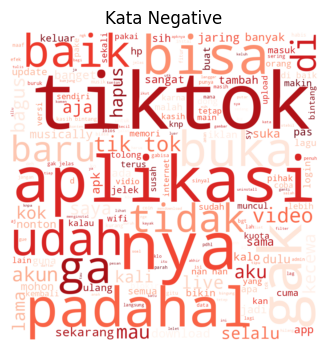

In [138]:
# menampilkan kata dominan positive seperti tiktok, gak, kecewa, padahal
all_text_s1 = ' '.join(str(word) for word in data_negative["content"])
wordcloud = WordCloud(colormap = 'Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text_s1)
plt.figure(figsize=(6, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Kata Negative')
plt.margins(x=0, y=0)
plt.show()

# **Spliting Data**

In [139]:
x = df.content
y = df.sentimen

In [140]:
#test split data
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

# **Training Data**

In [141]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

cvec=CountVectorizer()
tvec=TfidfVectorizer()
hvec=HashingVectorizer()

In [142]:
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# dan dibungkus pada variabel clf1, 2, dan 3
clf1 = SVC(kernel = "linear") #SVM
clf2 = MultinomialNB()  #naive bayes
clf3 = RandomForestClassifier() #Random Forest

In [143]:
# from sklearn.pipeline import Pipeline

# model1 = Pipeline([('vevtorizer', tvec)
#                   , 'classifier', clf1])
# model2 = Pipeline([('vevtorizer', tvec)
#                   , 'classifier', clf2])
# model3 = Pipeline([('vevtorizer', tvec)
#                   , 'classifier', clf3])

from sklearn.pipeline import Pipeline

model1 = Pipeline([('vevtorizer', tvec), ('classifier', clf1)])
model2 = Pipeline([('vevtorizer', tvec), ('classifier', clf2)])
model3 = Pipeline([('vevtorizer', tvec), ('classifier', clf3)])

In [146]:
x_train = x_train.fillna('')  # Ganti nilai NaN di kolom 'content' dengan string kosong

model1.fit(x_train, y_train)


Pipeline(steps=[('vevtorizer', TfidfVectorizer()),
                ('classifier', SVC(kernel='linear'))])

In [151]:
# Ganti nilai NaN di kolom 'content' dengan string kosong
x_test = x_test.fillna('')

hasil1 = model1.predict(x_test)

In [152]:
matrix = classification_report(y_test, hasil1)
print('Classification Report:\n', matrix)

Classification Report:
               precision    recall  f1-score   support

     negatif       0.36      0.17      0.23        24
     positif       0.71      0.88      0.78        56

    accuracy                           0.66        80
   macro avg       0.54      0.52      0.51        80
weighted avg       0.61      0.66      0.62        80



In [150]:
model2.fit(x_train, y_train)

Pipeline(steps=[('vevtorizer', TfidfVectorizer()),
                ('classifier', MultinomialNB())])

In [153]:
hasil2=model2.predict(x_test)

In [154]:
matrix = classification_report(y_test, hasil2)
print('Classification Report:\n', matrix)

Classification Report:
               precision    recall  f1-score   support

     negatif       1.00      0.04      0.08        24
     positif       0.71      1.00      0.83        56

    accuracy                           0.71        80
   macro avg       0.85      0.52      0.45        80
weighted avg       0.80      0.71      0.60        80



In [155]:
model3.fit(x_train, y_train)

Pipeline(steps=[('vevtorizer', TfidfVectorizer()),
                ('classifier', RandomForestClassifier())])

In [158]:
hasil3=model3.predict(x_test)

In [159]:
matrix = classification_report(y_test, hasil3)
print('Classification Report:\n', matrix)

Classification Report:
               precision    recall  f1-score   support

     negatif       0.24      0.17      0.20        24
     positif       0.68      0.77      0.72        56

    accuracy                           0.59        80
   macro avg       0.46      0.47      0.46        80
weighted avg       0.55      0.59      0.56        80



In [183]:
#mengkompare 3 algoritma
hasilSVC = accuracy_score(hasil1, y_test)
precision1 = precision_score(y_test, hasil1, average='weighted')
recall1 = recall_score(y_test, hasil1, average='weighted')
f1_1 = f1_score(y_test, hasil1, average='weighted')

hasilMultinomialNB = accuracy_score(hasil2, y_test)
precision2 = precision_score(y_test, hasil2, average='weighted')
recall2 = recall_score(y_test, hasil2, average='weighted')
f1_2 = f1_score(y_test, hasil2, average='weighted')

hasilRandomForestClassifier = accuracy_score(hasil3, y_test)
precision3 = precision_score(y_test, hasil3, average='weighted')
recall3 = recall_score(y_test, hasil3, average='weighted')
f1_3 = f1_score(y_test, hasil3, average='weighted')

In [184]:
model = {'Model':['SVC',
                  'Multinomial Naive Bayes',
                  'Random Forest Classifier'
                  ],
         'AccracyScore':[hasilSVC, hasilMultinomialNB, hasilRandomForestClassifier],
         'Precision':[precision1, precision2, precision3],
         'Recall':[recall1, recall2, recall3],
         'F1-score':[f1_1, f1_2, f1_3]
         }
model_df = pd.DataFrame(model)
model_df


,Model,AccracyScore,Precision,Recall,F1-score
0,SVC,0.6625,0.606192,0.6625,0.617371
1,Multinomial Naive Bayes,0.7125,0.796203,0.7125,0.604741
2,Random Forest Classifier,0.5875,0.548366,0.5875,0.564419


# **Testing**

In [185]:
# def classify_text(input_text):
#   models = {
#       'DecisionTreeClassifier': model_decisiontree,
#       'MultinomialNB': model_multinomialNaiveBayes,
#       'RandomForestClassifier': model_randomForest
#   }

#   results = {}
#   for name, model in models:
#     prediction = model.predict([input_text])
#     results[name] = prediction[0]

#   return results

def classify_text(input_text):
  models = {
      'svc': model_SVC,
      'MultinomialNB': model_multinomialNaiveBayes,
      'RandomForestClassifier': model_randomForest
  }

  results = {}
  # Iterate through the items (key-value pairs) of the dictionary
  for name, model in models.items(): # This line has been changed
    prediction = model.predict([input_text])
    results[name] = prediction[0]

  return results

In [186]:
model_SVC = model1.fit(x_train, y_train)
model_multinomialNaiveBayes = model2.fit(x_train, y_train)
model_randomForest = model3.fit(x_train, y_train)

In [187]:
input_text = input("Masukan kata yang mau diklasifikasi")

results = classify_text(input_text)

print("Input kata :", input_text)
print("\nHasil Klasifikasi :")
for model, prediction in results.items():
  print(f"{model}: {prediction}")

Masukan kata yang mau diklasifikasiBAGUS
Input kata : BAGUS

Hasil Klasifikasi :
svc: positif
MultinomialNB: positif
RandomForestClassifier: positif
